In [9]:
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

In [10]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
    
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

In [55]:
import sys, os
sys.path.append(os.getcwd()+"/common")

from common.functions import softmax, sigmoid, cross_entropy_error, sigmoid_grad
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params["W1"] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params["b1"] = np.zeros(hidden_size)
        self.params["W2"] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params["b2"] = np.zeros(output_size)
        
    def predict(self, x):
        W1, W2 = self.params["W1"], self.params["W2"]
        b1, b2 = self.params["b1"], self.params["b2"]
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = a2 # softmax(a2)
        return y
    
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        accuracy = np.sum(y == t)/ float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W : self.loss(x, t)
        grads = {}
        """
        grads["W1"] = numerical_gradient(loss_W, self.params["W1"])
        grads["b1"] = numerical_gradient(loss_W, self.params["b1"])
        grads["W2"] = numerical_gradient(loss_W, self.params["W2"])
        grads["b2"] = numerical_gradient(loss_W, self.params["b2"])
        """
        grads["W1"] = gradient(loss_W, self.params["W1"])
        grads["b1"] = gradient(loss_W, self.params["b1"])
        grads["W2"] = gradient(loss_W, self.params["W2"])
        grads["b2"] = gradient(loss_W, self.params["b2"])

        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = a2 # softmax(a2)
        """
        print(" print(a1.shape, z1.shape, a2.shape, y.shape, t.shape, batch_num) ")
        print(a1.shape, z1.shape, a2.shape, y.shape, t.shape, batch_num)
        """
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads
    

In [56]:
 x_batch.shape[0]

2

In [202]:
def f(x):
    return x[0]**2/20 + x[1]**2# +np.random.rand()

In [203]:
x_batch[0]

array([-7, -6])

In [204]:
x_batch = np.array([[-7, -6], [2, 3]])

In [205]:
t_batch = f(x_batch)

In [206]:
network = TwoLayerNet(input_size=2, hidden_size=2, output_size=2)

grads = network.gradient(x_batch, t_batch)
params = network.params

optimizer = SGD()

optimizer.update(params, grads)

In [207]:
optimizer.update(params, grads)

In [208]:
optimizer.update(params, grads)
params

{'W1': array([[ 0.00737814, -0.00870556],
        [-0.00401388,  0.00155734]]), 'W2': array([[ 0.09415611,  0.16421054],
        [ 0.10258139,  0.16087348]]), 'b1': array([  1.79181603e-04,   2.10017182e-05]), 'b2': array([ 0.19345368,  0.32399078])}

In [209]:
grads

{'W1': array([[ 0.0149286 ,  0.0017488 ],
        [ 0.00895588,  0.00104875]]), 'W2': array([[-3.20174598, -5.36219354],
        [-3.2552512 , -5.45180405]]), 'b1': array([-0.00597272, -0.00070006]), 'b2': array([ -6.44845591, -10.79969251])}

In [210]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
    
    return grad

In [218]:
x_in = np.arange(-10,10,1)
x0, x1 = np.meshgrid(x_in, x_in)
x = []
x.append(x0)
x.append(x1)

/Users/itouyuu/.pyenv/versions/3.6.0b3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Osaka'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


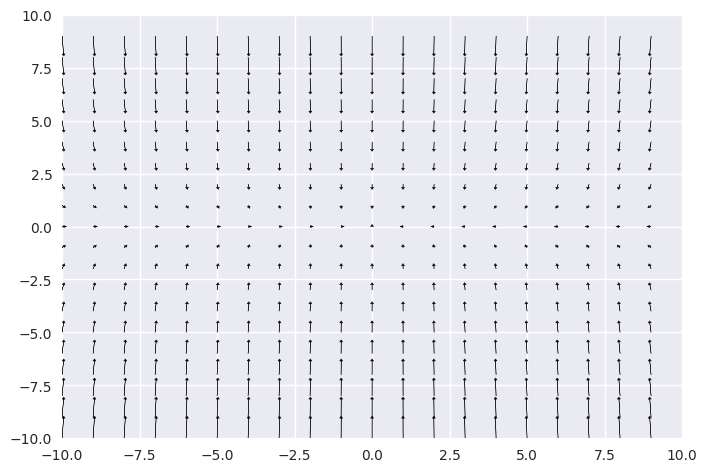

In [219]:
ax = plt.axes()
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
for idx in range(x[0].flatten().size):
    x0 = x[0].flatten()[idx]
    x1 = x[1].flatten()[idx]
    #print(numerical_gradient(function_2, np.array([x0, x1])))
    grad = numerical_gradient(f, np.array([x0, x1])) * 0.00001
    ax.arrow(x0,x1, -grad[0],-grad[1], head_width=0.1, head_length=0.1, fc='k', ec='k')

plt.show();

In [233]:
x0 = x[0].flatten()[idx]
x1 = x[1].flatten()[idx]
x_train = np.array([x[0].flatten(), x[1].flatten()])
t_train = f(x_train)

batch_size = 100

In [234]:
x_batch = np.random.choice(x_train, batch_size)

ValueError: a must be 1-dimensional

In [235]:
x_train

array([[-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9, -10,  -9,  -8,  -7,  -6,  -5,
         -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,
          9, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,
          2,   3,   4,   5,   6,   7,   8,   9, -10,  -9,  -8,  -7,  -6,
         -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7,
          8,   9, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9, -10,  -9,  -8,  -7,
         -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5,   6,
          7,   8,   9, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,
          0,   1,   2,   3,   4,   5,   6,   7,   8,   9, -10,  -9,  -8,
         -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5,
          6,   7,   8,   9, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,
         -1,   0,   1,   2,   3,   4,   5,   6,   7

In [229]:
np.random.choice(400, 100)

array([274, 113, 308, 152, 229, 350, 151, 127, 194, 166,  16, 196,  39,
       116, 287,  33, 180, 308, 182, 142, 340, 242, 212, 330, 199, 295,
       263, 113, 224, 309, 167, 204,  33, 399, 375, 338, 342, 336, 197,
       327, 342, 137, 260, 211,  72,   3,  46, 393, 399, 319, 211, 124,
       297, 245,  14, 287, 331, 292, 190, 218,  81, 174, 157,   2, 108,
         8,  10, 351, 348, 303, 176, 239, 134,  46, 281, 121, 387, 156,
       289, 282, 357, 265,  43, 206, 344, 386, 363, 346, 255,  56,  41,
       287, 394, 347, 109, 385, 234,  86,  82, 235])